In [134]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as pyplot
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np

pyplot.rcParams['figure.figsize'] = [18, 9]
pyplot.rcParams['figure.dpi'] = 100

In [135]:
xRange = 2.
xMin = -1.
uRange = 2.
uMin = -1.

subdivs = 100

maxHeight = 40

# Make data.
X = np.linspace(xMin, xMin+xRange, subdivs)
xlen = len(X)
U = np.linspace(uMin, uMin+uRange, subdivs)
ulen = len(U)
X, U = np.meshgrid(X, U)

# Create an empty array of strings with the same shape as the meshgrid, and
# populate it with two colors in a checkerboard pattern.
colortuple = ('y', 'b')
colors = np.empty(X.shape, dtype=str)
for u in range(ulen):
    for _x in range(xlen):
        colors[_x, u] = colortuple[(_x + u) % len(colortuple)]

In [149]:
eps = 1.e-10

def f(x, u):
    val = x**2/(u+eps)
    return val.clip(-maxHeight, maxHeight)

def u(x, u_0):
    return np.sqrt((u_0*0j)**2+(2./3)*x**3).real

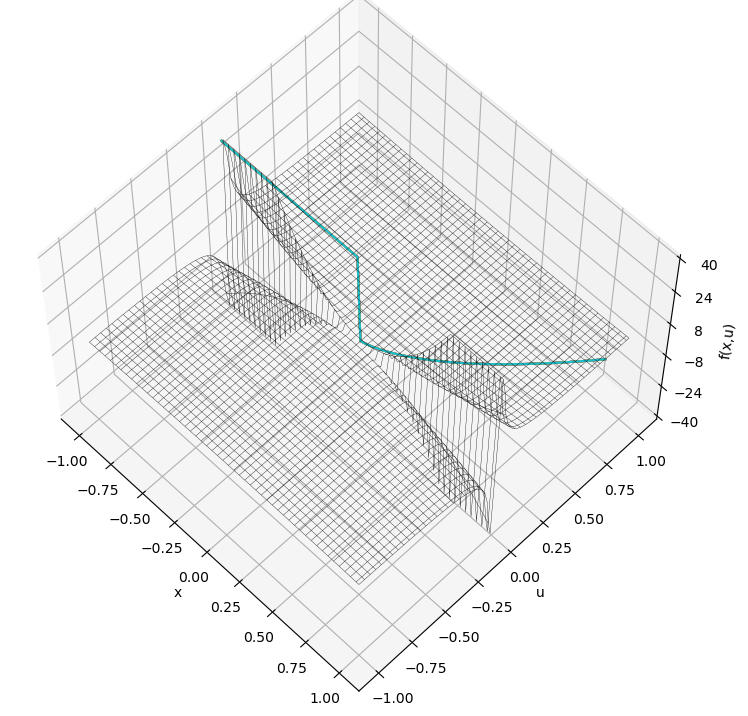

In [151]:
fig = pyplot.figure()
ax = fig.gca(projection='3d')

ax.view_init(60, -45)

F = f(X, U)

for u_0 in np.linspace(-0.8, 0.8, 10):
    x = np.linspace(xMin, xMin+xRange, subdivs)
    u_ = u(x, u_0)
    ux = f(x, u_)
    ax.plot3D(x, u_, ux)

# Plot the surface with face colors taken from the array we made.
#surf = ax.plot_surface(X, U, F, facecolors=colors, linewidth=0)
#surf = ax.contour3D(X, U, F, 100, cmap='binary')
surf = ax.plot_wireframe(X, U, F, color='k', lw=.25)

# Customize the z axis.
ax.set_zlim(-maxHeight, maxHeight)
pyplot.xlabel("x")
pyplot.ylabel("u")
ax.set_zlabel("f(x,u)")
ax.w_zaxis.set_major_locator(LinearLocator(6))


In [89]:
np.power

<ufunc 'power'>